In [1]:
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, svm
from sklearn.metrics import accuracy_score, classification_report


In [10]:
year = 2137

first = year // 1000
second = (year // 100) % 10
third = (year // 10) % 10
fourth = year % 10

fourth


7

In [27]:
num = max(1, 3, -5, 7) + min(-3, 6, -8, -1) + abs(-17)
print(num)

16


In [18]:
x = 2

if (x % 2 != 0) or (6 <= x <= 20 and x % 2 == 0):
    print('YES')
elif (x % 2 == 0 and x > 20) or (2 <= x <= 5 and x % 2 == 0):
    print('NO')

NO


In [9]:
a = int(input())
if a >= 2 and a <= 17:
    b = 3
    p = a * a + b * b
else:
    b = 5
p = (a + b) * (a + b)
print(p)

100


In [2]:
module_path = os.path.abspath(os.path.join('..'))
print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)

/home/egm/egm_projects/seldon/example_dvc_project/corus_rubrication/corus_rubrication


In [3]:
DATA_PATH = os.path.join('..','data','proceed')
DATA_PATH

'../data/proceed'

In [4]:
df = pd.read_csv(f'{DATA_PATH}/data_clean.csv')
df

,url,topics,title,text,len
0,https://russian.rt.com/world/news/644618-parla...,Мир,парламентарий сша фрг россия провести встреча ...,информировать риа новость ссылка план зарубежн...,39.0
1,https://russian.rt.com/sport/news/644617-mok-a...,Спорт,мокнуть принять решение лишить признание aiba,решение сессия мокнуть швейцарский лозанна aib...,37.0
2,https://russian.rt.com/sport/news/644611-giner...,Спорт,гинер допустить приглашение иностранный клуб рпл,субъективный мнение рпл обязательный расширять...,46.0
3,https://russian.rt.com/world/news/644610-rossi...,Мир,россия поставить турция июль,июль осуществлять рамка план поставка приводит...,46.0
4,https://russian.rt.com/sport/news/644606-semak...,Спорт,семак заявить видеть позитив изменение формат ...,позиция оставаться неизменный лимит таковой ра...,54.0
...,...,...,...,...,...
53319,https://russian.rt.com/sport/news/445239-pilot...,Спорт,пилот формула хэмилтон стать самый высокооплач...,сообщать nsky sportsn случай успешный завершен...,53.0
53320,https://russian.rt.com/world/news/445224-terro...,Мир,губернатор исполнитель теракт нью йорк связать...,связать иго радикализоваться внутри страна рас...,47.0
53321,https://russian.rt.com/world/news/445219-zahar...,Мир,захаров считать twitter давление заблокировать...,ход расширить заседание совфедя посвященного в...,65.0
53322,https://russian.rt.com/sport/news/445236-syomi...,Спорт,главный тренер футбольный локомотив отказаться...,никто сравнивать ничто рекомендовать тренер сб...,42.0


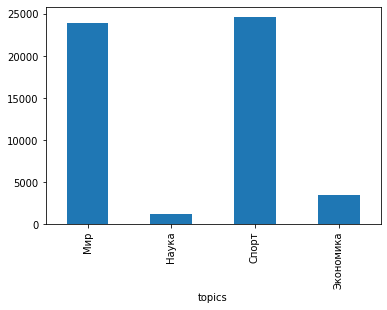

In [5]:
df.groupby('topics').text.count().plot.bar(ylim=0)
plt.show()

In [19]:
Tfidf_vect = TfidfVectorizer(max_features=500)
Tfidf_vect.fit(df['text'])

X = Tfidf_vect.transform(df['text'])

In [20]:
Encoder = LabelEncoder()
Encoder.fit(df['topics'])

label_category = dict(zip(Encoder.classes_, Encoder.transform(Encoder.classes_)))
print(label_category)

y = Encoder.fit_transform(df['topics'])

{'Мир': 0, 'Наука': 1, 'Спорт': 2, 'Экономика': 3}


In [22]:
from sklearn.model_selection import cross_validate

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)
clf = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')

scores = cross_validate(clf, X, y, cv=cv, scoring='f1_macro')
scores.keys()
scores 

{'fit_time': array([61.75702119, 60.55858374, 60.5519588 , 61.5968821 , 59.26572919]),
 'score_time': array([26.99598694, 26.84275103, 28.53959942, 29.17911816, 27.37465429]),
 'test_score': array([0.82960836, 0.82105918, 0.8368702 , 0.8182541 , 0.83601791])}

In [30]:
target_names = ['Мир', 'Наука', 'Спорт', 'Экономика']
print(classification_report(test_Y, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Мир       0.92      0.97      0.94      7164
       Наука       0.87      0.49      0.63       403
       Спорт       0.99      0.98      0.98      7411
   Экономика       0.82      0.71      0.76      1020

    accuracy                           0.94     15998
   macro avg       0.90      0.79      0.83     15998
weighted avg       0.94      0.94      0.94     15998



In [31]:
from sklearn import metrics

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)
clf = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')

scoring = ['f1_macro']
scores = cross_validate(clf, X, y, cv=cv, scoring=scoring)
scores

{'fit_time': array([61.53918242, 60.19138694, 58.24529433, 59.57169557, 59.4478302 ]),
 'score_time': array([26.41301656, 26.48131227, 24.81566119, 25.61456013, 26.91833496]),
 'test_f1_macro': array([0.82960836, 0.82105918, 0.8368702 , 0.8182541 , 0.83601791])}